In [34]:
import pandas as pd
apple_csv = pd.read_csv('Apple.csv')
amazon_csv = pd.read_csv('Amazon.csv')
google_csv = pd.read_csv('Google.csv')
micro_csv = pd.read_csv('Microsoft.csv')
netflix_csv = pd.read_csv('Netflix.csv')

apple_csv.columns = [f'Apple_{col}' if col != 'Date' else 'Date' for col in apple_csv.columns]
amazon_csv.columns = [f'Amazon_{col}' if col != 'Date' else 'Date' for col in amazon_csv.columns]
google_csv.columns = [f'Google_{col}' if col != 'Date' else 'Date' for col in google_csv.columns]
micro_csv.columns = [f'Microsoft_{col}' if col != 'Date' else 'Date' for col in micro_csv.columns]
netflix_csv.columns = [f'Netflix_{col}' if col != 'Date' else 'Date' for col in netflix_csv.columns]

merged_df = apple_csv
merged_df = pd.merge(merged_df, amazon_csv, on='Date', how='outer')
merged_df = pd.merge(merged_df, google_csv, on='Date', how='outer')
merged_df = pd.merge(merged_df, micro_csv, on='Date', how='outer')
merged_df = pd.merge(merged_df, netflix_csv, on='Date', how='outer')

# converts to proper 
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
columns_without_date = merged_df.drop(columns=['Date']).columns.tolist()
merged_df[columns_without_date] = merged_df[columns_without_date].apply(pd.to_numeric, errors='coerce')

# remove rows with missing vals
merged_df.dropna(inplace=True)

# makes date as key
merged_df.set_index('Date', inplace=True)

# removes and duplicate rows
merged_df.drop_duplicates(inplace=True)

# extracts only the years we want
df = merged_df[500:2150]



/var/folders/_1/4ff39r7j7cs78zsqt7mb3tr80000gn/T/ipykernel_96293/4099115857.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{company}_Avg'] = (df[f'{company}_High'] + df[f'{company}_Low']) / 2
/var/folders/_1/4ff39r7j7cs78zsqt7mb3tr80000gn/T/ipykernel_96293/4099115857.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{company}_Avg'] = (df[f'{company}_High'] + df[f'{company}_Low']) / 2
/var/folders/_1/4ff39r7j7cs78zsqt7mb3tr80000gn/T/ipykernel_96293/4099115857.py:14: SettingWithCopyWarning:

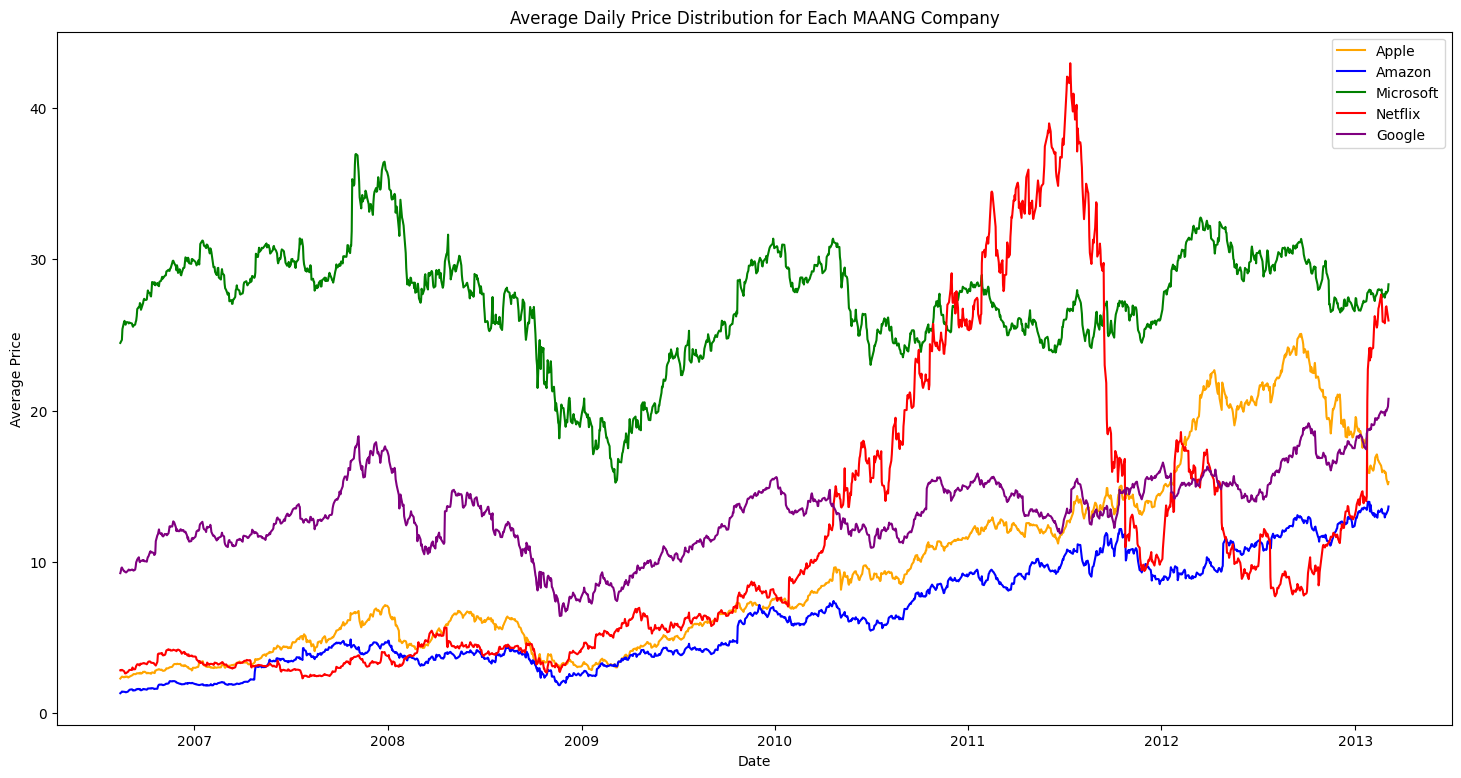

In [35]:
# Line Plot
import matplotlib.pyplot as plt

# dict of companies to line colors
companies = {
    'Apple': 'orange',
    'Amazon': 'blue',
    'Microsoft': 'green',
    'Netflix': 'red',
    'Google': 'purple'
}

# iterates and extracts the company averages per day
for company in companies.keys():
    df[f'{company}_Avg'] = (df[f'{company}_High'] + df[f'{company}_Low']) / 2

# plots the indv company average distributions
plt.figure(figsize=(18, 9))
for company, color in companies.items():
    plt.plot(df.index, df[f'{company}_Avg'], label=company, color=color)

# label and title
plt.title('Average Daily Price Distribution for Each MAANG Company')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()